In [1]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
def set_seed(seed: int = 42) -> None:
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    print(f"Random seed set as {seed}")


set_seed(42)

Random seed set as 42


# Загрузка датасета

In [3]:
df = pd.read_csv("cybersequrity.csv")

df.head()

,svcscan.fs_drivers,callbacks.ngeneric,psxview.not_in_eprocess_pool_false_avg,psxview.not_in_eprocess_pool,callbacks.nanonymous,psxview.not_in_session,psxview.not_in_pslist,psxview.not_in_pspcid_list,psxview.not_in_ethread_pool,psxview.not_in_csrss_handles,psxview.not_in_pslist_false_avg,psxview.not_in_pspcid_list_false_avg,psxview.not_in_deskthrd,psxview.not_in_ethread_pool_false_avg,psxview.not_in_session_false_avg,Class
0,26,8,0.0,0,0,2,0,0,0,4,0.000000,0.000000,6,0.000000,0.044444,1
1,26,8,0.0,0,0,5,3,3,3,7,0.073171,0.073171,9,0.073171,0.121951,1
2,26,8,0.0,0,0,9,7,7,7,11,0.152174,0.152174,13,0.152174,0.195652,1
3,26,8,0.0,0,0,3,1,1,2,6,0.022222,0.022222,9,0.044444,0.066667,1
4,26,8,0.0,0,0,2,0,0,0,4,0.000000,0.000000,6,0.000000,0.048780,0


In [4]:
df.describe()

,svcscan.fs_drivers,callbacks.ngeneric,psxview.not_in_eprocess_pool_false_avg,psxview.not_in_eprocess_pool,callbacks.nanonymous,psxview.not_in_session,psxview.not_in_pslist,psxview.not_in_pspcid_list,psxview.not_in_ethread_pool,psxview.not_in_csrss_handles,psxview.not_in_pslist_false_avg,psxview.not_in_pspcid_list_false_avg,psxview.not_in_deskthrd,psxview.not_in_ethread_pool_false_avg,psxview.not_in_session_false_avg,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25.995400,7.999800,0.000069,0.001700,0.000800,3.859000,1.859300,1.85880,2.299500,6.301900,0.040579,0.040569,8.290700,0.047741,0.087565,0.509600
std,0.210198,0.014141,0.001133,0.041198,0.028274,3.016625,3.016623,3.01645,4.827249,4.828653,0.057255,0.057253,4.945568,0.067768,0.054770,0.499933
min,11.000000,7.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000,0.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.011834,0.000000
25%,26.000000,8.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000,0.000000,4.000000,0.000000,0.000000,6.000000,0.000000,0.048780,0.000000
50%,26.000000,8.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000,1.000000,5.000000,0.020997,0.020997,7.000000,0.023256,0.066667,1.000000
75%,26.000000,8.000000,0.000000,0.000000,0.000000,5.000000,3.000000,3.00000,3.000000,7.000000,0.068182,0.068182,9.000000,0.071429,0.113636,1.000000
max,26.000000,8.000000,0.027778,1.000000,1.000000,37.000000,35.000000,35.00000,139.000000,143.000000,0.500000,0.500000,145.000000,0.771084,0.528571,1.000000


In [5]:
df.shape

(10000, 16)

# Подготовка данных

In [6]:
# Разделение на признаки и целевую переменную
X = df.drop("Class", axis=1)
y = df["Class"]

# Разбивка
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=12
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25,
    stratify=y_temp,
    random_state=24,
)

# Вывод результата
print(f"Всего ({1.0*100}%): {df.shape[0]}")
print(f"Тренировачный ({len(X_train)/len(X)*100:.1f}%): {len(X_train)}")
print(f"Валидационный ({len(X_val)/len(X)*100:.1f}%): {len(X_val)}")
print(f"Тестовый ({len(X_test)/len(X)*100:.1f}%): {len(X_test)} ")

Всего (100.0%): 10000
Тренировачный (60.0%): 6000
Валидационный (20.0%): 2000
Тестовый (20.0%): 2000 


In [7]:
# Стандартизация данных
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [8]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y.values)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [9]:
train_dataset = CustomDataset(X_train_scaled, y_train)
val_dataset = CustomDataset(X_val_scaled, y_val)
test_dataset = CustomDataset(X_test_scaled, y_test)

In [10]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

# Нейросетевая модель

In [11]:
class CustomModel(nn.Module):
    def __init__(self, input_size):
        super(CustomModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.layers(x)

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = CustomModel(input_size=X_train.shape[1]).to(device)

# Код обучения и оценки модели

In [13]:
def train_loop(model, train_loader, criterion, optimizer):
    model.train()
    total_loss = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        output = model(X).squeeze()
        loss = criterion(output, y)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(train_loader)

In [14]:
def eval_loop(model, val_loader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for X, y in val_loader:
            X, y = X.to(device), y.to(device)
            output = model(X).squeeze()
            loss = criterion(output, y)
            total_loss += loss.item()

    return total_loss / len(val_loader)

In [15]:
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            outputs = model(X).squeeze()
            preds = (outputs >= 0.5).float()

            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(y.cpu().numpy())

    return classification_report(all_targets, all_preds)

In [16]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_losses = []
best_val_loss = float("inf")
best_model_state = None

In [17]:
# Цикл обучения
for epoch in range(500):
    train_loss = train_loop(model, train_loader, criterion, optimizer)
    val_loss = eval_loop(model, val_loader, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Сохраняем лучшую модель по validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict().copy()

    if (epoch + 1) % 50 == 0:
        print(f"Эпоха {epoch+1}/{500}:")
        print(f"Тренировачный Loss: {train_loss:.4f}")
        print(f"Валидационный Loss: {val_loss:.4f}")

Эпоха 50/500:
Тренировачный Loss: 0.4771
Валидационный Loss: 0.4847
Эпоха 100/500:
Тренировачный Loss: 0.4559
Валидационный Loss: 0.4646
Эпоха 150/500:
Тренировачный Loss: 0.4438
Валидационный Loss: 0.4542
Эпоха 200/500:
Тренировачный Loss: 0.4328
Валидационный Loss: 0.4458
Эпоха 250/500:
Тренировачный Loss: 0.4234
Валидационный Loss: 0.4457
Эпоха 300/500:
Тренировачный Loss: 0.4127
Валидационный Loss: 0.4303
Эпоха 350/500:
Тренировачный Loss: 0.4045
Валидационный Loss: 0.4224
Эпоха 400/500:
Тренировачный Loss: 0.3988
Валидационный Loss: 0.4160
Эпоха 450/500:
Тренировачный Loss: 0.4104
Валидационный Loss: 0.4580
Эпоха 500/500:
Тренировачный Loss: 0.4017
Валидационный Loss: 0.4629


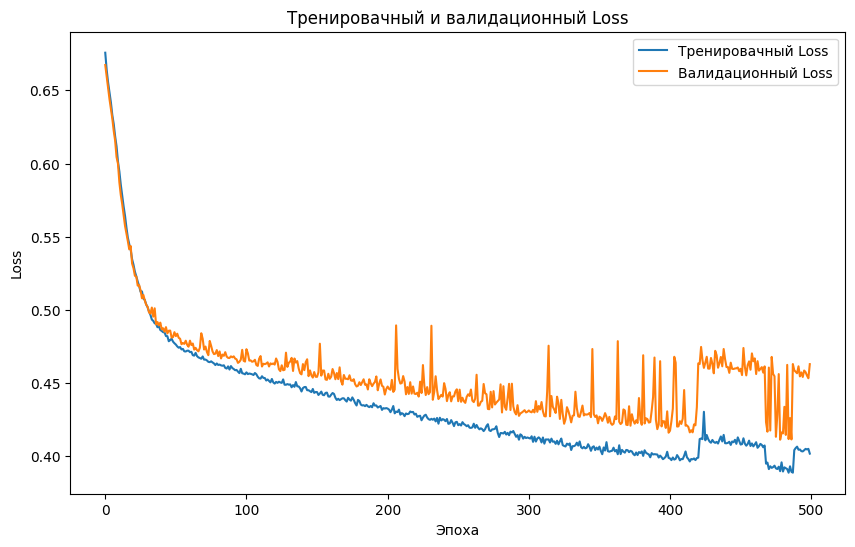

In [18]:
# Загружаем лучшую модель
model.load_state_dict(best_model_state)

# Визуализация процесса обучения
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Тренировачный Loss")
plt.plot(val_losses, label="Валидационный Loss")
plt.xlabel("Эпоха")
plt.ylabel("Loss")
plt.title("Тренировачный и валидационный Loss")
plt.legend()

plt.show()

In [19]:
# Оценка модели на тестовой выборке
print(evaluate_model(model, test_loader))

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80       981
         1.0       0.82      0.78      0.80      1019

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



# Обоснование архитектуры и параметров

Количество слоев:

- 2 слоя (1 скрытый + 1 выходной) как базовый вариант
- Минимальная конфигурация, способная выучить нелинейные зависимости
- Максимально простая архитектура для базовой модели
- Быстрая сходимость и низкий риск переобучения


Размеры слоев:

- Один скрытый слой размерности 32 для начального преобразования признаков
- Размер достаточно мал, чтобы избежать излишней сложности
- Выходной слой размерности 1 для бинарной классификации


Активации:

- ReLU как самый базовый и простой вариант
- Легкость в обучении и интерпретации
- Отсутствие проблемы затухающих градиентов
- Sigmoid для получения вероятностей в диапазоне [0,1]


Функция потерь:

 - `nn.BCELoss()`
 - Оптимальна для задач бинарной классификации
 - Хорошо работает в паре с sigmoid-активацией на выходном слое
 - Позволяет оценивать расхождение между предсказанными вероятностями и истинными метками классов


Оптимизатор:

 - `Adam`
 - Адаптивная настройка learning rate для каждого параметра
 - Хорошая сходимость в большинстве задач
 - Устойчивость к выбору learning rate
 - Эффективная работа с разреженными градиентами
 - Learning rate = 0.001 - стандартное значение для Adam, обеспечивающее баланс между скоростью сходимости и стабильностью

# Улучшение архитектуры модели

In [20]:
class FirstModel(nn.Module):
    def __init__(self, input_size, dropout_rate=0.2):
        super(FirstModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(32, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.layers(x)

In [21]:
def train_and_evaluate_model(
    model, train_loader, val_loader, test_loader, n_epochs=500, lr=0.001, patience=10
):
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    val_losses = []
    best_val_loss = float("inf")
    best_model_state = None
    counter = 0

    for epoch in range(n_epochs):
        train_loss = train_loop(model, train_loader, criterion, optimizer)
        val_loss = eval_loop(model, val_loader, criterion)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict().copy()
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print(f"Остановка на эпохе {epoch+1}")
                break

        if (epoch + 1) % 10 == 0:
            print(f"Эпоха {epoch+1}/{n_epochs}:")
            print(f"Тренировачный Loss: {train_loss:.4f}")
            print(f"Валидационный Loss: {val_loss:.4f}")

    # Загружаем лучшую модель
    model.load_state_dict(best_model_state)

    # Оцениваем на тестовой выборке
    test_performance = evaluate_model(model, test_loader)

    return train_losses, val_losses, test_performance

In [22]:
dropout_rates = [0.1, 0.2, 0.3]
batch_sizes = [32, 64, 128]
learning_rates = [0.001, 0.0005]


Эксперимент с dropout_rate=0.1, batch_size=32, lr=0.001
Эпоха 10/500:
Тренировачный Loss: 0.4886
Валидационный Loss: 0.5636
Эпоха 20/500:
Тренировачный Loss: 0.4625
Валидационный Loss: 0.6229
Эпоха 30/500:
Тренировачный Loss: 0.4491
Валидационный Loss: 0.5383
Остановка на эпохе 31


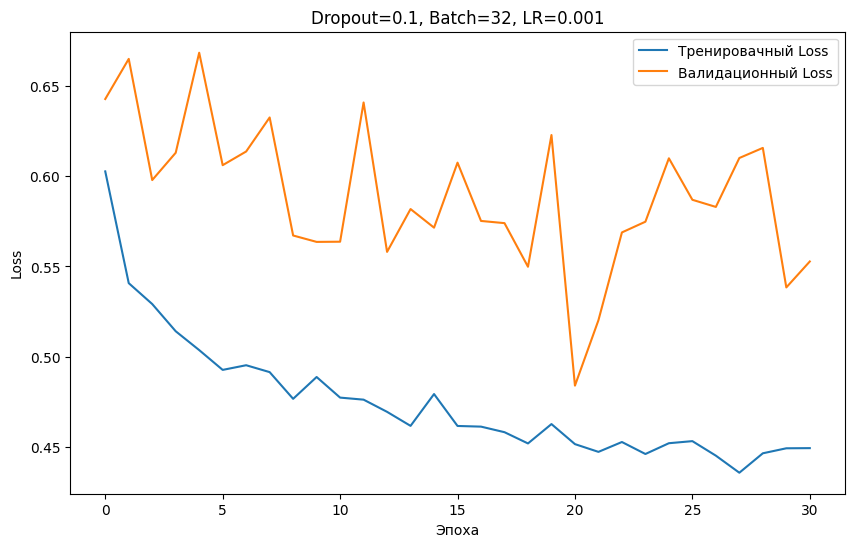


Эксперимент с dropout_rate=0.1, batch_size=32, lr=0.0005
Эпоха 10/500:
Тренировачный Loss: 0.4835
Валидационный Loss: 0.6250
Эпоха 20/500:
Тренировачный Loss: 0.4515
Валидационный Loss: 0.5230
Эпоха 30/500:
Тренировачный Loss: 0.4347
Валидационный Loss: 0.5279
Эпоха 40/500:
Тренировачный Loss: 0.4201
Валидационный Loss: 0.5119
Остановка на эпохе 44


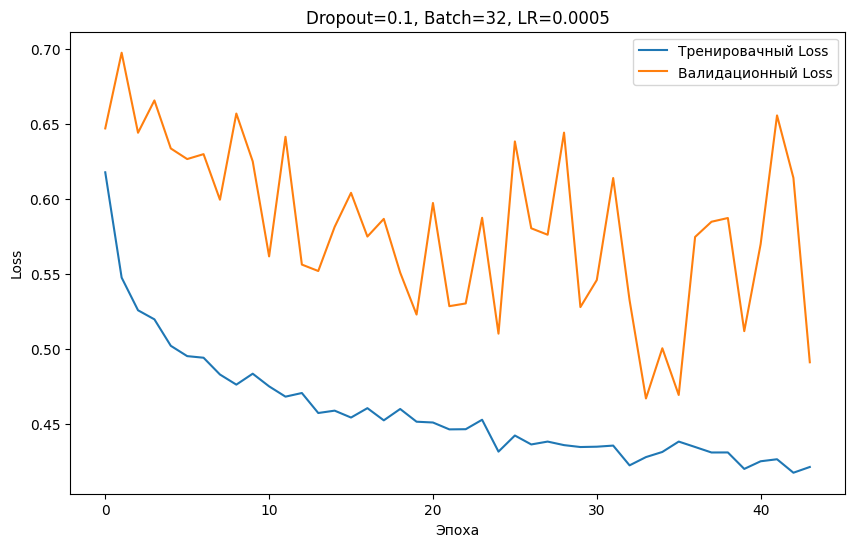


Эксперимент с dropout_rate=0.1, batch_size=64, lr=0.001
Эпоха 10/500:
Тренировачный Loss: 0.4542
Валидационный Loss: 0.5357
Эпоха 20/500:
Тренировачный Loss: 0.4452
Валидационный Loss: 0.4722
Эпоха 30/500:
Тренировачный Loss: 0.4179
Валидационный Loss: 0.4812
Эпоха 40/500:
Тренировачный Loss: 0.4111
Валидационный Loss: 0.4459
Эпоха 50/500:
Тренировачный Loss: 0.3896
Валидационный Loss: 0.4327
Остановка на эпохе 55


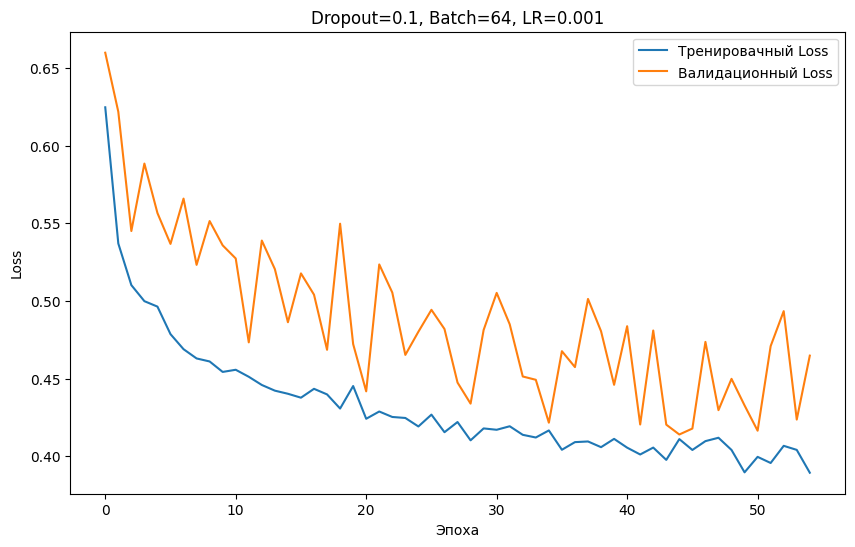


Эксперимент с dropout_rate=0.1, batch_size=64, lr=0.0005
Эпоха 10/500:
Тренировачный Loss: 0.4754
Валидационный Loss: 0.5176
Эпоха 20/500:
Тренировачный Loss: 0.4383
Валидационный Loss: 0.4781
Остановка на эпохе 30


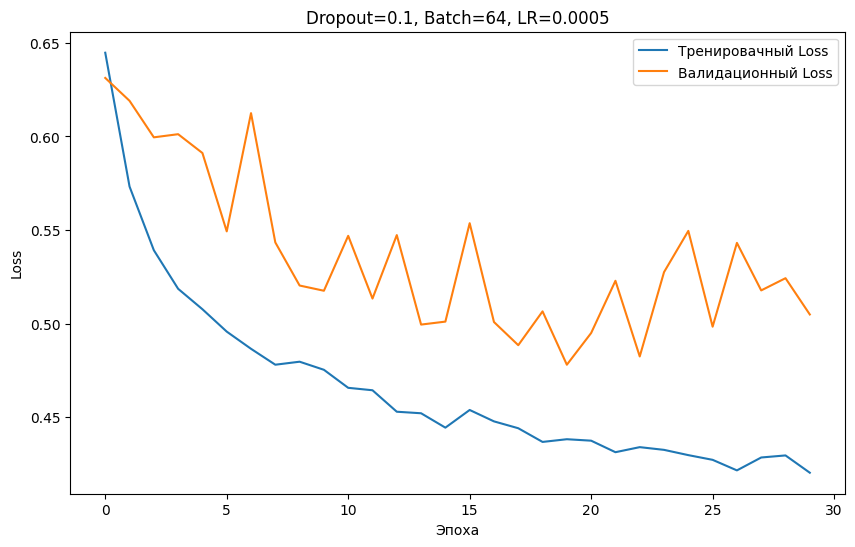


Эксперимент с dropout_rate=0.1, batch_size=128, lr=0.001
Эпоха 10/500:
Тренировачный Loss: 0.4631
Валидационный Loss: 0.5431
Эпоха 20/500:
Тренировачный Loss: 0.4318
Валидационный Loss: 0.4523
Эпоха 30/500:
Тренировачный Loss: 0.4028
Валидационный Loss: 0.4552
Эпоха 40/500:
Тренировачный Loss: 0.3997
Валидационный Loss: 0.4513
Эпоха 50/500:
Тренировачный Loss: 0.4009
Валидационный Loss: 0.4093
Эпоха 60/500:
Тренировачный Loss: 0.3854
Валидационный Loss: 0.4063
Остановка на эпохе 67


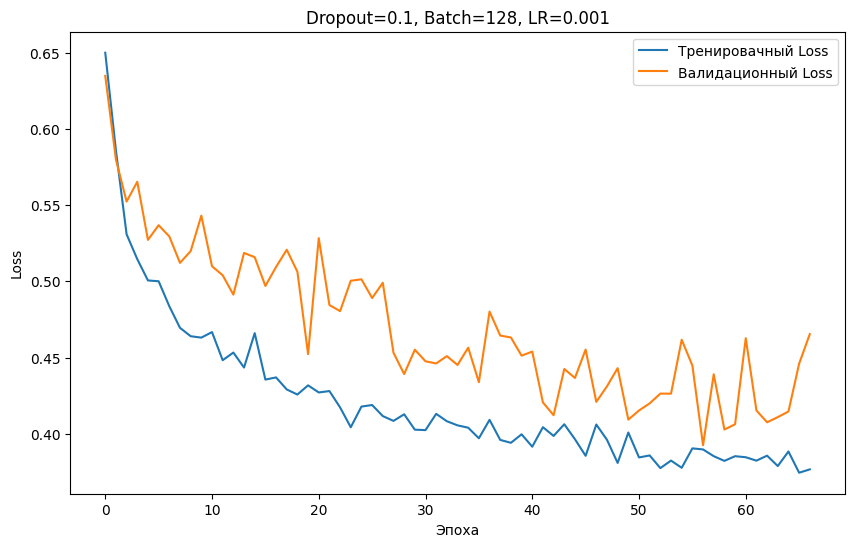


Эксперимент с dropout_rate=0.1, batch_size=128, lr=0.0005
Эпоха 10/500:
Тренировачный Loss: 0.4682
Валидационный Loss: 0.5004
Эпоха 20/500:
Тренировачный Loss: 0.4285
Валидационный Loss: 0.4850
Эпоха 30/500:
Тренировачный Loss: 0.4167
Валидационный Loss: 0.4869
Эпоха 40/500:
Тренировачный Loss: 0.3985
Валидационный Loss: 0.4655
Эпоха 50/500:
Тренировачный Loss: 0.3916
Валидационный Loss: 0.4502
Эпоха 60/500:
Тренировачный Loss: 0.3850
Валидационный Loss: 0.4548
Остановка на эпохе 61


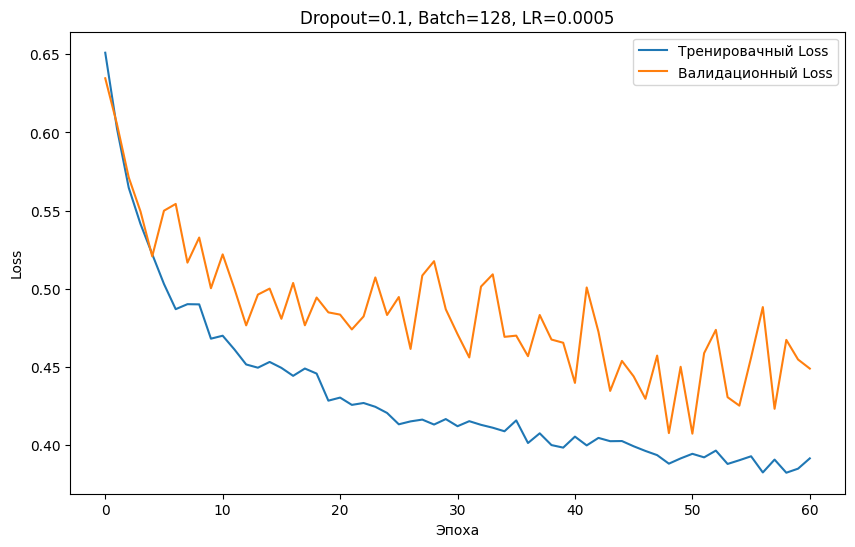


Эксперимент с dropout_rate=0.2, batch_size=32, lr=0.001
Эпоха 10/500:
Тренировачный Loss: 0.5086
Валидационный Loss: 0.5923
Остановка на эпохе 16


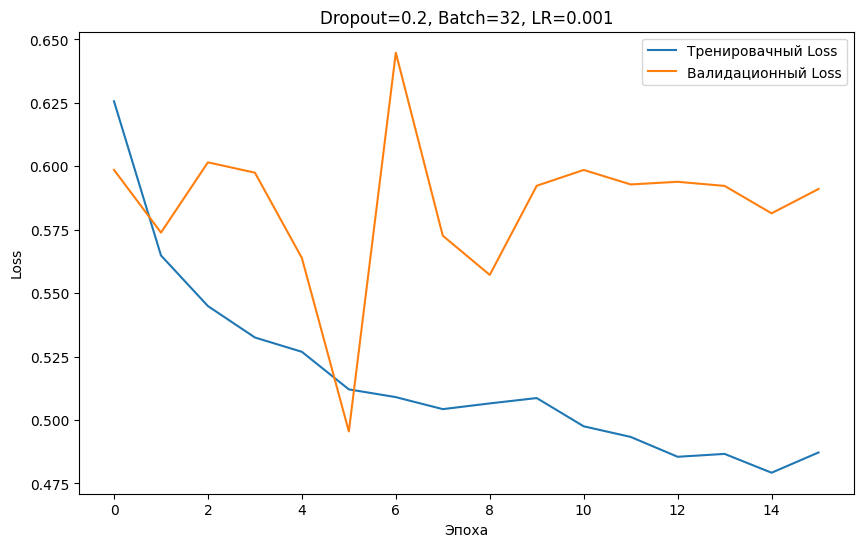


Эксперимент с dropout_rate=0.2, batch_size=32, lr=0.0005
Эпоха 10/500:
Тренировачный Loss: 0.5015
Валидационный Loss: 0.5802
Эпоха 20/500:
Тренировачный Loss: 0.4663
Валидационный Loss: 0.5225
Эпоха 30/500:
Тренировачный Loss: 0.4571
Валидационный Loss: 0.5572
Остановка на эпохе 32


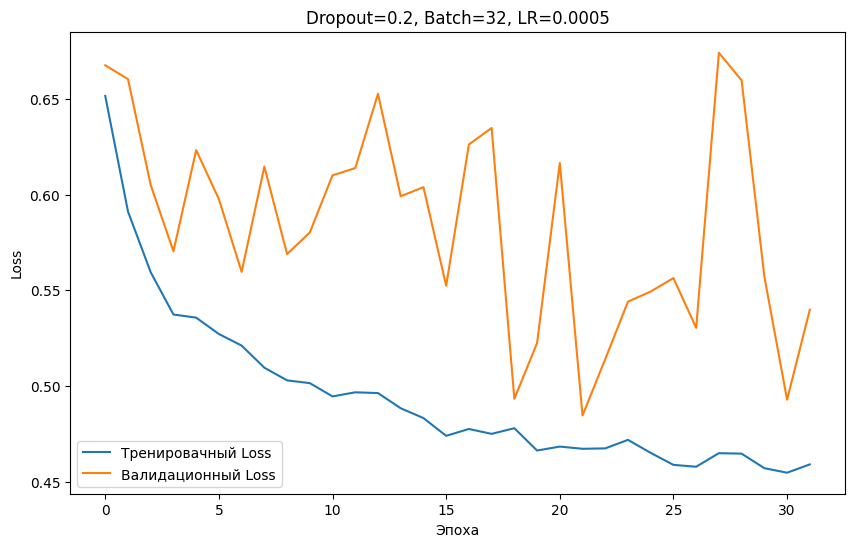


Эксперимент с dropout_rate=0.2, batch_size=64, lr=0.001
Эпоха 10/500:
Тренировачный Loss: 0.4864
Валидационный Loss: 0.5229
Эпоха 20/500:
Тренировачный Loss: 0.4580
Валидационный Loss: 0.5286
Остановка на эпохе 23


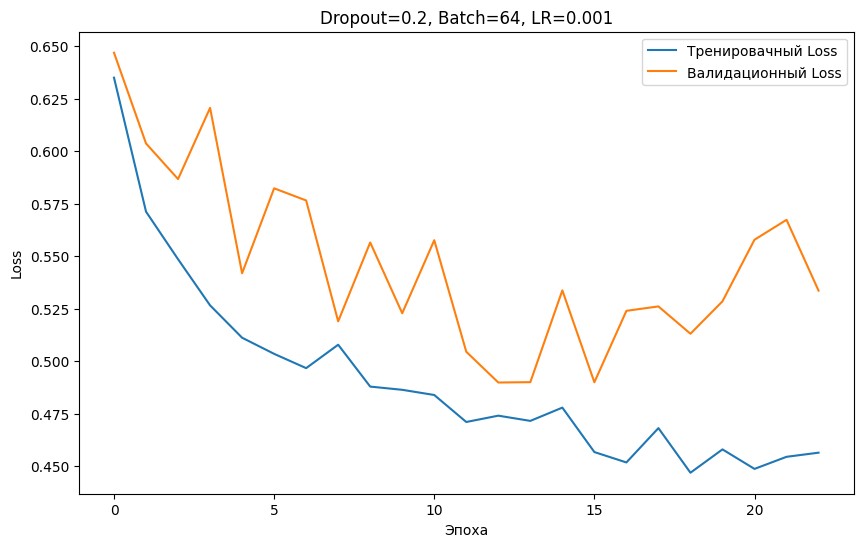


Эксперимент с dropout_rate=0.2, batch_size=64, lr=0.0005
Эпоха 10/500:
Тренировачный Loss: 0.5000
Валидационный Loss: 0.5452
Эпоха 20/500:
Тренировачный Loss: 0.4684
Валидационный Loss: 0.5431
Остановка на эпохе 28


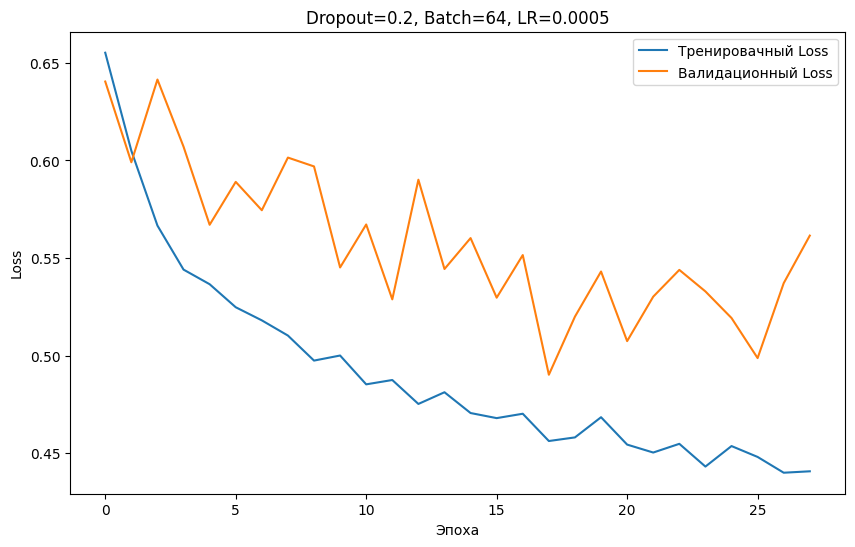


Эксперимент с dropout_rate=0.2, batch_size=128, lr=0.001
Эпоха 10/500:
Тренировачный Loss: 0.4785
Валидационный Loss: 0.5273
Эпоха 20/500:
Тренировачный Loss: 0.4402
Валидационный Loss: 0.4748
Эпоха 30/500:
Тренировачный Loss: 0.4298
Валидационный Loss: 0.4354
Эпоха 40/500:
Тренировачный Loss: 0.4021
Валидационный Loss: 0.4551
Остановка на эпохе 48


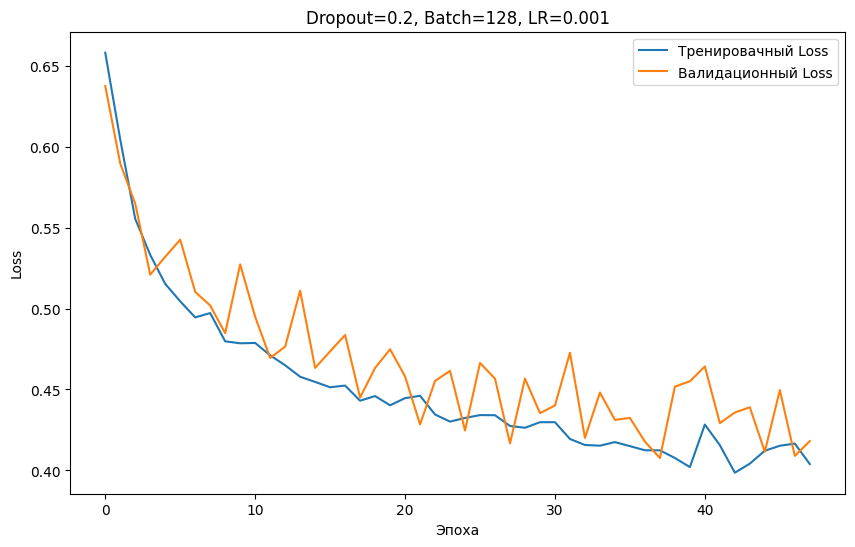


Эксперимент с dropout_rate=0.2, batch_size=128, lr=0.0005
Эпоха 10/500:
Тренировачный Loss: 0.5032
Валидационный Loss: 0.5486
Эпоха 20/500:
Тренировачный Loss: 0.4667
Валидационный Loss: 0.4843
Эпоха 30/500:
Тренировачный Loss: 0.4431
Валидационный Loss: 0.4850
Эпоха 40/500:
Тренировачный Loss: 0.4340
Валидационный Loss: 0.4770
Эпоха 50/500:
Тренировачный Loss: 0.4290
Валидационный Loss: 0.4608
Остановка на эпохе 55


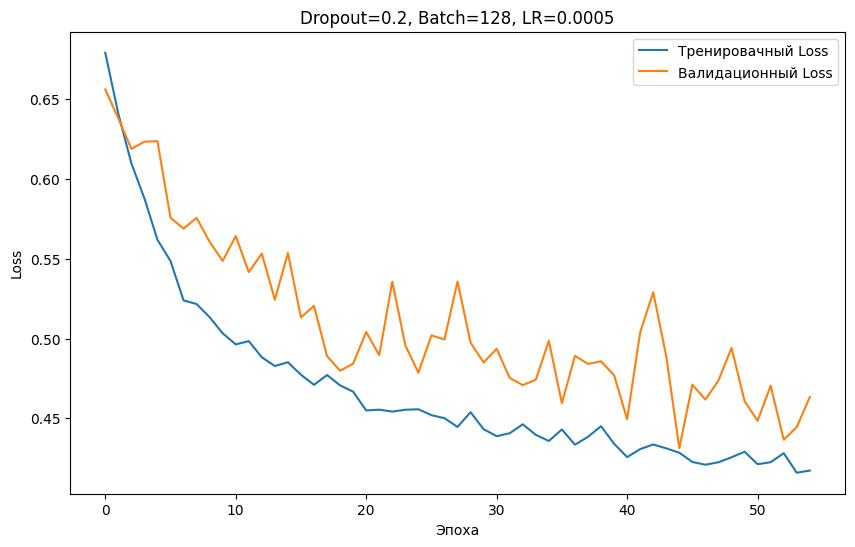


Эксперимент с dropout_rate=0.3, batch_size=32, lr=0.001
Эпоха 10/500:
Тренировачный Loss: 0.5150
Валидационный Loss: 0.5811
Эпоха 20/500:
Тренировачный Loss: 0.4968
Валидационный Loss: 0.6207
Остановка на эпохе 28


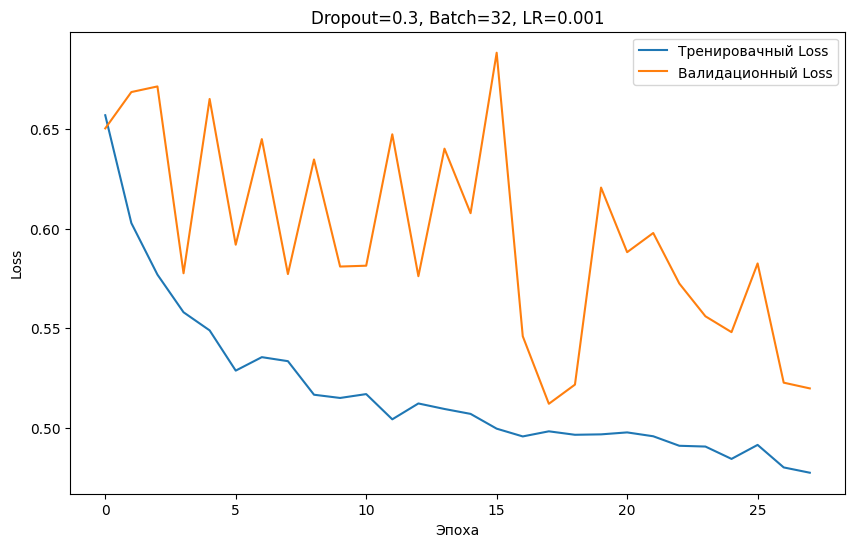


Эксперимент с dropout_rate=0.3, batch_size=32, lr=0.0005
Эпоха 10/500:
Тренировачный Loss: 0.5222
Валидационный Loss: 0.5895
Эпоха 20/500:
Тренировачный Loss: 0.4941
Валидационный Loss: 0.5539
Эпоха 30/500:
Тренировачный Loss: 0.4801
Валидационный Loss: 0.5690
Остановка на эпохе 38


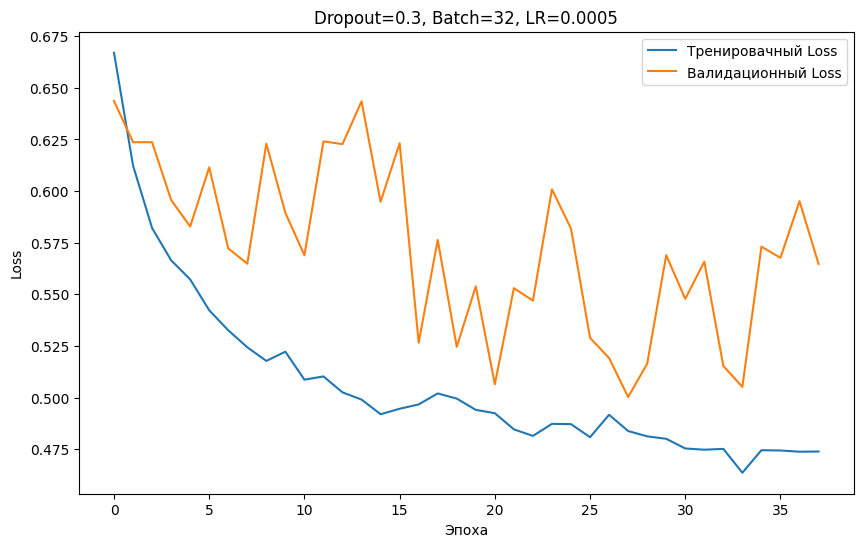


Эксперимент с dropout_rate=0.3, batch_size=64, lr=0.001
Эпоха 10/500:
Тренировачный Loss: 0.4985
Валидационный Loss: 0.5244
Эпоха 20/500:
Тренировачный Loss: 0.4795
Валидационный Loss: 0.5910
Остановка на эпохе 22


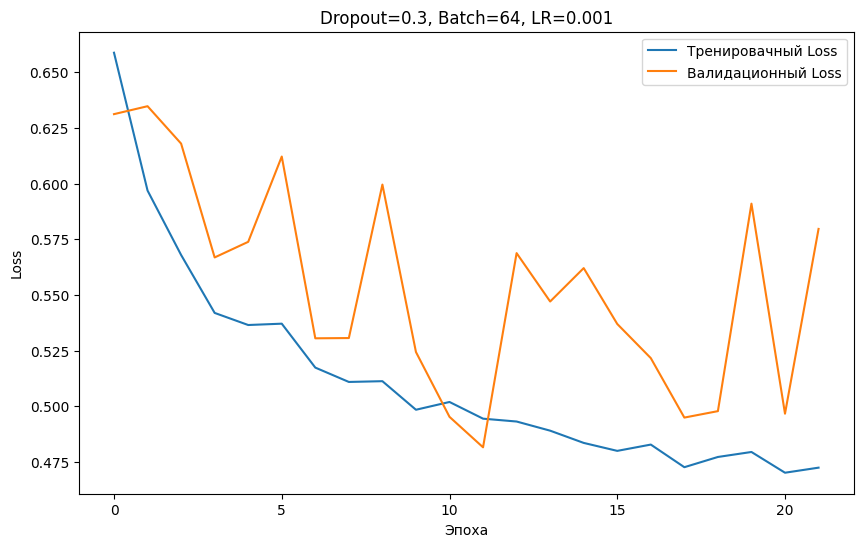


Эксперимент с dropout_rate=0.3, batch_size=64, lr=0.0005
Эпоха 10/500:
Тренировачный Loss: 0.5190
Валидационный Loss: 0.6117
Эпоха 20/500:
Тренировачный Loss: 0.4869
Валидационный Loss: 0.5418
Остановка на эпохе 28


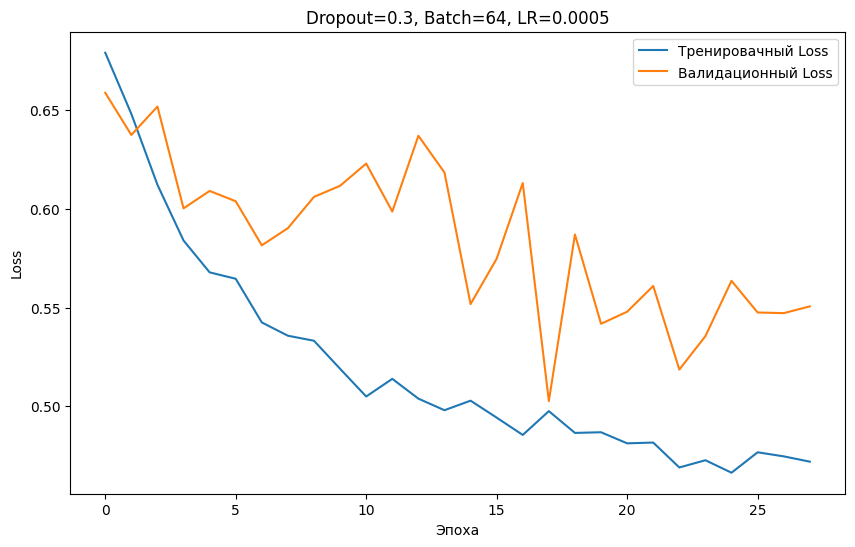


Эксперимент с dropout_rate=0.3, batch_size=128, lr=0.001
Эпоха 10/500:
Тренировачный Loss: 0.5128
Валидационный Loss: 0.6014
Эпоха 20/500:
Тренировачный Loss: 0.4729
Валидационный Loss: 0.4924
Эпоха 30/500:
Тренировачный Loss: 0.4514
Валидационный Loss: 0.4965
Эпоха 40/500:
Тренировачный Loss: 0.4431
Валидационный Loss: 0.4595
Остановка на эпохе 47


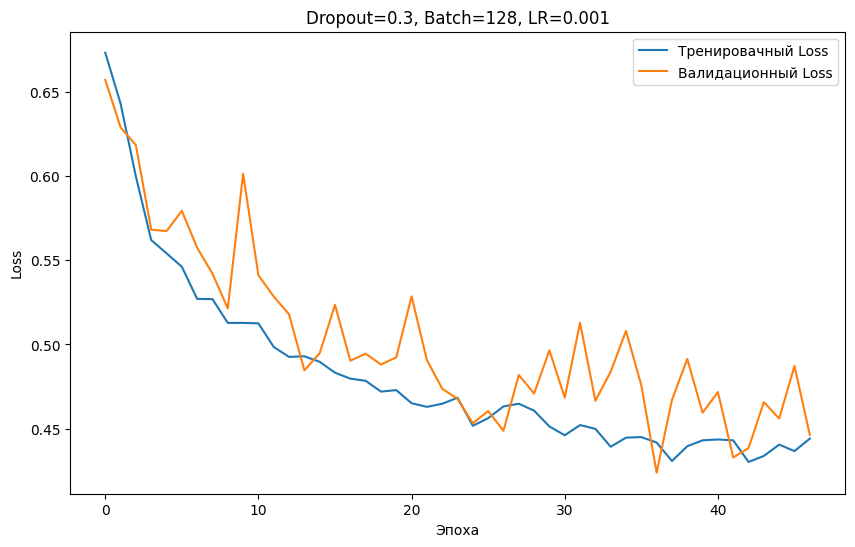


Эксперимент с dropout_rate=0.3, batch_size=128, lr=0.0005
Эпоха 10/500:
Тренировачный Loss: 0.5207
Валидационный Loss: 0.5376
Эпоха 20/500:
Тренировачный Loss: 0.4891
Валидационный Loss: 0.5180
Эпоха 30/500:
Тренировачный Loss: 0.4669
Валидационный Loss: 0.4724
Эпоха 40/500:
Тренировачный Loss: 0.4600
Валидационный Loss: 0.4703
Эпоха 50/500:
Тренировачный Loss: 0.4330
Валидационный Loss: 0.5026
Остановка на эпохе 53


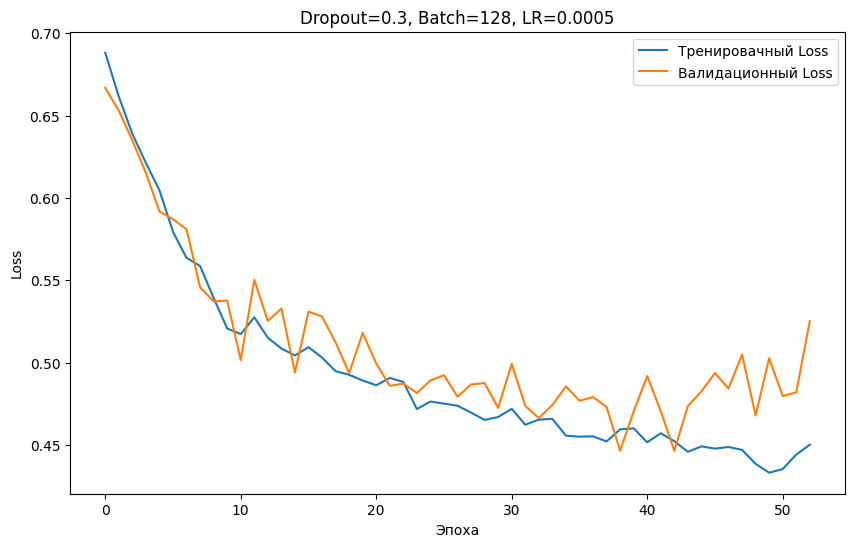

In [23]:
results = []

for dropout_rate in dropout_rates:
    for batch_size in batch_sizes:
        for lr in learning_rates:
            print(
                f"\nЭксперимент с dropout_rate={dropout_rate}, batch_size={batch_size}, lr={lr}"
            )

            # Создаем даталоадеры с новым batch_size
            train_loader = DataLoader(
                train_dataset, batch_size=batch_size, shuffle=True
            )
            val_loader = DataLoader(val_dataset, batch_size=batch_size)
            test_loader = DataLoader(test_dataset, batch_size=batch_size)

            model = FirstModel(
                input_size=X_train.shape[1], dropout_rate=dropout_rate
            ).to(device)

            train_losses, val_losses, test_perf = train_and_evaluate_model(
                model, train_loader, val_loader, test_loader, lr=lr
            )

            results.append(
                {
                    "dropout_rate": dropout_rate,
                    "batch_size": batch_size,
                    "lr": lr,
                    "test_performance": test_perf,
                    "train_losses": train_losses,
                    "val_losses": val_losses,
                }
            )

            plt.figure(figsize=(10, 6))
            plt.plot(train_losses, label="Тренировачный Loss")
            plt.plot(val_losses, label="Валидационный Loss")
            plt.xlabel("Эпоха")
            plt.ylabel("Loss")
            plt.title(f"Dropout={dropout_rate}, Batch={batch_size}, LR={lr}")
            plt.legend()

            plt.show()

In [24]:
# Найдем лучший эксперимент по accuracy
best_experiment = max(
    results, key=lambda x: float(x["test_performance"].split("\n")[3].split()[-2])
)

print("\nЛучшая конфигурация:")
print(f"Dropout Rate: {best_experiment['dropout_rate']}")
print(f"Batch Size: {best_experiment['batch_size']}")
print(f"Learning Rate: {best_experiment['lr']}")
print(best_experiment["test_performance"])


Лучшая конфигурация:
Dropout Rate: 0.1
Batch Size: 128
Learning Rate: 0.0005
              precision    recall  f1-score   support

         0.0       0.82      0.73      0.77       981
         1.0       0.76      0.85      0.80      1019

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000



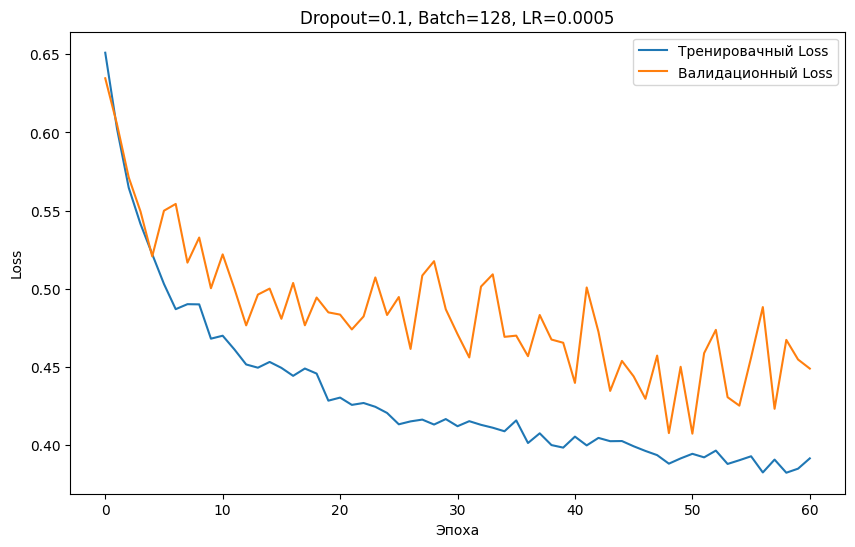

In [25]:
# Визуализация процесса обучения лучшей модели
plt.figure(figsize=(10, 6))
plt.plot(best_experiment["train_losses"], label="Тренировачный Loss")
plt.plot(best_experiment["val_losses"], label="Валидационный Loss")
plt.xlabel("Эпоха")
plt.ylabel("Loss")
plt.title(
    f'Dropout={best_experiment["dropout_rate"]}, Batch={best_experiment["batch_size"]}, LR={best_experiment["lr"]}'
)
plt.legend()

plt.show()

# Лучшая улучшеная модель

In [26]:
class BestModel(nn.Module):
    def __init__(self, input_size):
        super(BestModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),  # Добавляем BatchNorm только перед последним слоем
            nn.Linear(32, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.layers(x)

In [27]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = BestModel(input_size=X_train.shape[1]).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [28]:
train_losses = []
val_losses = []
best_val_loss = float("inf")
best_model_state = None

# Цикл обучения
for epoch in range(500):
    train_loss = train_loop(model, train_loader, criterion, optimizer)
    val_loss = eval_loop(model, val_loader, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict().copy()

    if (epoch + 1) % 50 == 0:
        print(f"Эпоха {epoch+1}/{500}:")
        print(f"Тренировачный Loss: {train_loss:.4f}")
        print(f"Валидационный Loss: {val_loss:.4f}")


Эпоха 50/500:
Тренировачный Loss: 0.3565
Валидационный Loss: 0.3950
Эпоха 100/500:
Тренировачный Loss: 0.3437
Валидационный Loss: 0.3645
Эпоха 150/500:
Тренировачный Loss: 0.3280
Валидационный Loss: 0.3827
Эпоха 200/500:
Тренировачный Loss: 0.3242
Валидационный Loss: 0.3557
Эпоха 250/500:
Тренировачный Loss: 0.3116
Валидационный Loss: 0.3710
Эпоха 300/500:
Тренировачный Loss: 0.3280
Валидационный Loss: 0.3392
Эпоха 350/500:
Тренировачный Loss: 0.3131
Валидационный Loss: 0.3276
Эпоха 400/500:
Тренировачный Loss: 0.3097
Валидационный Loss: 0.3285
Эпоха 450/500:
Тренировачный Loss: 0.3070
Валидационный Loss: 0.3212
Эпоха 500/500:
Тренировачный Loss: 0.3020
Валидационный Loss: 0.3346


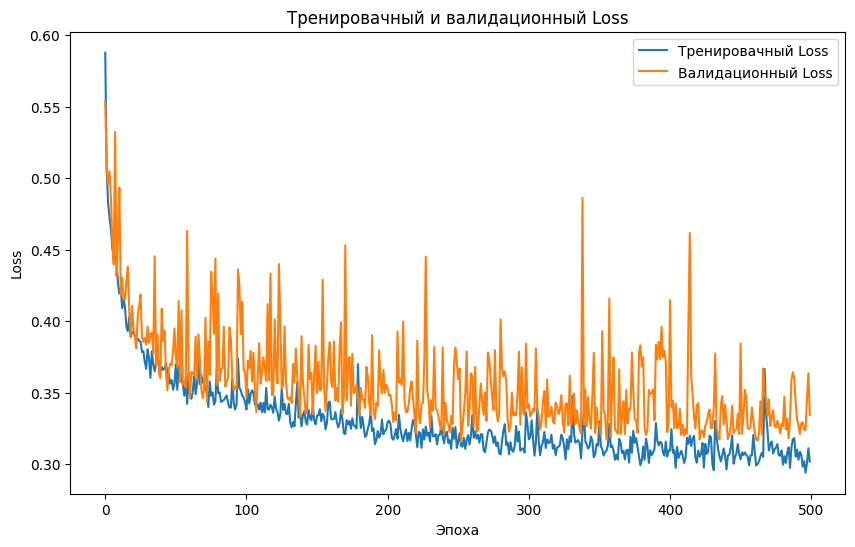

In [29]:
# Загружаем лучшую модель
model.load_state_dict(best_model_state)

# Визуализация процесса обучения
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Тренировачный Loss")
plt.plot(val_losses, label="Валидационный Loss")
plt.xlabel("Эпоха")
plt.ylabel("Loss")
plt.title("Тренировачный и валидационный Loss")
plt.legend()

plt.show()

In [30]:
# Оценка на тестовой выборке
print(evaluate_model(model, test_loader))

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       981
         1.0       0.86      0.80      0.83      1019

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000

